In [3]:
from load_data import load_data_XY
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import time
%matplotlib notebook 

In [4]:
from sklearn.neural_network import MLPRegressor

In [5]:
import pickle as pkl

In [6]:
with open("../features.pkl", 'rb') as f:
    inds = pkl.load(f)
X, Y, labels, strains = load_data_XY("../data/PGT121_Neu_OccAA.csv", inds)

C:\Users\Sky\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [7]:
from sklearn.model_selection import GridSearchCV


In [26]:
t0 = time.time()
params = [{
    'hidden_layer_sizes':[(50, ), (20,)], 
    'activation':['relu', 'logistic'],
    'solver':['sgd', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init':np.logspace(-5, 0, 6),
    'alpha':np.logspace(-5, 1, 7)
}]
reg = GridSearchCV(MLPRegressor(), params, cv=10, n_jobs = -1, verbose = 10)
reg.fit(X_train, y_train)
t1 = time.time()
print("%0.2f minutes elapsed" %((t1-t0)/60))

Fitting 10 folds for each of 672 candidates, totalling 6720 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   15.3s
[Paralle

5.59 minutes elapsed


C:\Users\sky\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [27]:
best_params = reg.best_params_
means = reg.cv_results_['mean_test_score']
stds = reg.cv_results_['std_test_score']

In [29]:
print(best_params)

{'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}


In [28]:
for mean, std, params in zip(means, stds, reg.cv_results_['params']):
    print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params), flush = True)

-0.0866 (+/-0.0915) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'sgd'}
0.3587 (+/-0.3304) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'lbfgs'}
0.2074 (+/-0.1895) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.3776 (+/-0.2906) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.5409 (+/-0.1514) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.3684 (+/-0.2954) for {'activation': 'relu'

0.3712 (+/-0.5244) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.0894 (+/-0.4661) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'lbfgs'}
-0.0286 (+/-0.0546) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'sgd'}
0.1746 (+/-0.4440) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
-0.0144 (+/-0.1811) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'sgd'}
0.3804 (+/-0.1412) for {'activation': 'relu', 'alpha':

0.2218 (+/-0.4049) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.3222 (+/-0.4828) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.1602 (+/-0.3338) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'lbfgs'}
0.0111 (+/-0.2142) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'sgd'}
0.1159 (+/-0.4115) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
-0.0742 (+/-0.3120) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_

0.1472 (+/-0.4073) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.3695 (+/-0.4365) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.1918 (+/-0.3478) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'lbfgs'}
-0.0205 (+/-0.0491) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'sgd'}
0.1134 (+/-0.4787) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
0.0144 (+/-0.3665) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init':

0.1284 (+/-0.4625) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.3739 (+/-0.3961) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.2375 (+/-0.3892) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'lbfgs'}
-0.0226 (+/-0.0409) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'sgd'}
0.1953 (+/-0.3532) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
-0.0128 (+/-0.1188) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_

0.5098 (+/-0.2494) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.1676 (+/-0.5682) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.5138 (+/-0.2099) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.1677 (+/-0.4143) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.3317 (+/-0.3179) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.1424 (+/-0.4561) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_

0.5169 (+/-0.2230) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.4822 (+/-0.2668) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.5369 (+/-0.1922) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.3683 (+/-0.2954) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.3778 (+/-0.5799) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.3767 (+/-0.3702) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'so

0.5224 (+/-0.1746) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.5565 (+/-0.1838) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.5961 (+/-0.1685) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.5428 (+/-0.1866) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.4339 (+/-0.4339) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.5533 (+/-0.1878) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1000000000000000

-0.1054 (+/-0.3240) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'sgd'}
0.1639 (+/-0.4637) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'lbfgs'}
-0.0197 (+/-0.0248) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.0876 (+/-0.6538) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.1463 (+/-0.0827) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.0979 (+/-0.4676) for 

0.5744 (+/-0.1608) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.1495 (+/-0.4847) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'lbfgs'}
-0.0828 (+/-0.2498) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0, 'solver': 'sgd'}
0.0733 (+/-0.3923) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
-0.0654 (+/-0.1709) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'sgd'}
0.0955 (+/-0.4182) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learnin

0.2277 (+/-0.4210) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.5915 (+/-0.1892) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.1450 (+/-0.2550) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'lbfgs'}
-0.0360 (+/-0.0610) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0, 'solver': 'sgd'}
0.1920 (+/-0.3989) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
-0.1014 (+/-0.3110) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', '

0.1576 (+/-0.0950) for {'activation': 'logistic', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.2590 (+/-0.3116) for {'activation': 'logistic', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.5250 (+/-0.4313) for {'activation': 'logistic', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.2965 (+/-0.2898) for {'activation': 'logistic', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.5537 (+/-0.1747) for {'activation': 'logistic', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.3038 (+/-0.2790) for {'activation': 'logistic', 'alpha': 0.100

-0.0101 (+/-0.0339) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.4736 (+/-0.2678) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.1623 (+/-0.0619) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.4623 (+/-0.1976) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.4691 (+/-0.4994) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.4764 (+/-0.2218) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'sol

0.5822 (+/-0.1570) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'lbfgs'}
-0.0018 (+/-0.0439) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.5824 (+/-0.1568) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.1215 (+/-0.0814) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.5821 (+/-0.1568) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.4618 (+/-0.3283) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learn

In [30]:
y_pred = reg.predict(X_test)
print("r2: {}".format(r2_score(y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))

r2: 0.5985090774270649
MSE: 1.021966945156193


In [31]:
sort_means = means
sort_stds = stds
sort_params = reg.cv_results_['params']

In [32]:
sort_means, sort_stds, sort_params = zip(*sorted(zip(sort_means, sort_stds, sort_params), key = lambda x:x[0], reverse = True))

for mean, std, params in zip(sort_means, sort_stds, sort_params):
        print("%0.20f (+/-%0.20f) for %r" % (mean, std * 2, params), flush = True)

0.60145632959223915837 (+/-0.17554021318368037696) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.60129105171951657827 (+/-0.16640153955174780132) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.59672186360626255919 (+/-0.16280865052107398872) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.59605767324857450440 (+/-0.16853688665312760442) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.59411437939873290581 (+/-0.16715148951391112231) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.

0.58127057412116700519 (+/-0.15707036974675417373) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.58124959788951191531 (+/-0.15650971984136388682) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.58123149702408893891 (+/-0.15718018077840378854) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.58116440327234053509 (+/-0.15683021745345829268) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'lbfgs'}
0.58105625929875726055 (+/-0.15697739265298429889) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_in

0.55147517708715210194 (+/-0.16130717662533719525) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.55129727128756012000 (+/-0.17269564522606231649) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
0.55108988137821424136 (+/-0.18346328220188717895) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.54959354739976851167 (+/-0.16719194277944626759) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.54903554325347436738 (+/-0.16456022078305179712) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0

0.51694535537942032377 (+/-0.22299511014232284434) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.51670340441877748994 (+/-0.20174711292637176330) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.51655213034866742650 (+/-0.19033447965085734110) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.51383897546193491035 (+/-0.20985130196727397323) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.51377166345267955005 (+/-0.15972207937049634485) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001,

0.47280883079728563967 (+/-0.23169499274389190879) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.47228942964854053743 (+/-0.24067125597068039777) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
0.47089141232840997509 (+/-0.26558298421928588917) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.46910759378440619605 (+/-0.49938930016286287028) for {'activation': 'logistic', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.46641739297676448883 (+/-0.24577429997456615163) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
0

0.40118857791808659741 (+/-0.26829786745506783996) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.39939815080613555454 (+/-0.25362848049551023344) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.39744458268173576965 (+/-0.39180630587061637815) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.39713450562942637090 (+/-0.56655396058977958162) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.39513718118870622131 (+/-0.51180624083895720489) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 

0.35447621886591801355 (+/-0.22567999448855557976) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.35324104225795016632 (+/-0.35543649450493047803) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'lbfgs'}
0.35034349769625577897 (+/-0.31857644711754928846) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'lbfgs'}
0.35001944173714860664 (+/-0.31865886507359592050) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.34915427369003476654 (+/-0.28275357986973947977) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learn

0.31752987338454780053 (+/-0.34179363596705020223) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.31624215364474050904 (+/-0.41769508751147166326) for {'activation': 'logistic', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.31576963475008273941 (+/-0.30702650617082627438) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'lbfgs'}
0.31349529159661082556 (+/-0.39804128016279505253) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
0.31332094703844559636 (+/-0.33333224758218049644) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_

0.27920774329538067260 (+/-0.34217809277596861195) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.27629464989204616243 (+/-0.43122520955642429374) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.10000000000000001, 'solver': 'lbfgs'}
0.27615994084249351204 (+/-0.43294261903898961785) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.27544613813648133327 (+/-0.45979582022892506732) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
0.27282235161532947254 (+/-0.31504594868260371587) for {'activation': 'logistic', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (2

0.22870638523979269774 (+/-0.46446857020678100625) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.22773273501408683450 (+/-0.42103274095925535825) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.22769341667138737195 (+/-0.58473647345797352681) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.22590720618726212177 (+/-0.36808355101352918659) for {'activation': 'relu', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'lbfgs'}
0.22414950896338031727 (+/-0.53017258671664868608) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptiv

0.18054021050488774924 (+/-0.43905664768647756357) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'lbfgs'}
0.17962201468538013804 (+/-0.59189497314729622168) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'lbfgs'}
0.17959209275325785371 (+/-0.45190868635912984086) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.17703076886170343585 (+/-0.42588379628417161182) for {'activation': 'relu', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.17640316819484094801 (+/-0.50799670512520844756) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_

0.14820687703560830872 (+/-0.46297123580003302079) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'lbfgs'}
0.14812290673694206156 (+/-0.09485443666064696799) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.14785029939003760391 (+/-0.41763474721860094352) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.14771697646731532516 (+/-0.51437521550941889270) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.10000000000000001, 'solver': 'sgd'}
0.14722094837859292515 (+/-0.40733118071058072029) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_

0.08756526761899573186 (+/-0.65379744371555648108) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.08318973131078491456 (+/-0.17194233556152088704) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.07392202521946902860 (+/-0.56147092629893358140) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
0.07326498830873783008 (+/-0.39232977044056260851) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 1.0, 'solver': 'lbfgs'}
0.07031112266624391094 (+/-0.58310811626521741324) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_ra

-0.01326971762581304060 (+/-0.04153368263400147864) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
-0.01346014195603165500 (+/-0.06133227461264047220) for {'activation': 'logistic', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
-0.01440533678931420550 (+/-0.18109307859713152933) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'sgd'}
-0.01546640390790055518 (+/-0.05703356327692025995) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
-0.01649829229733453667 (+/-0.05457263190271925690) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'le

-0.03802220981214476242 (+/-0.06894264133927376081) for {'activation': 'logistic', 'alpha': 1.0000000000000001e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'sgd'}
-0.03950112739128826267 (+/-0.08150292591068454551) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'sgd'}
-0.04125012896507942312 (+/-0.08938190963695728797) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 1.0000000000000001e-05, 'solver': 'sgd'}
-0.04125184616796406106 (+/-0.09683425495910540082) for {'activation': 'logistic', 'alpha': 0.10000000000000001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 1.0, 'solver': 'sgd'}
-0.04297280962723141334 (+/-0.13669176646148095688) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'cons

-4.15164252690096446941 (+/-8.98011329112123313223) for {'activation': 'logistic', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'sgd'}
-1376.23378782450981816510 (+/-7587.16597999118130246643) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'sgd'}
-39669.11550103602348826826 (+/-237419.38961284924880601466) for {'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 1.0, 'solver': 'sgd'}


In [24]:
0.2708 (+/-0.1500) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.2674 (+/-0.1628) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.2666 (+/-0.1344) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.2658 (+/-0.1562) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.2657 (+/-0.0993) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}


SyntaxError: invalid syntax (<ipython-input-24-3c6801470a5e>, line 1)

In [17]:
params = {
    'hidden_layer_sizes': (50,), 
    'activation': 'relu',     'solver': 'sgd'.
    'alpha': 10.0,
    'learning_rate': 'constant',
    'learning_rate_init': 0.01, 
    'max_iter':3000,
    
}

In [19]:
fin_reg = MLPRegressor(hidden_layer_sizes = (50,), 
                       activation = 'relu',solver = 'sgd', 
                       alpha = 10.0, learning_rate = 'constant',
                      learning_rate_init = 0.01,
                      max_iter = 3000).fit(X_train, y_train)

In [20]:
y_pred = fin_reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.580732422654
1.02162575816


<IPython.core.display.Javascript object>


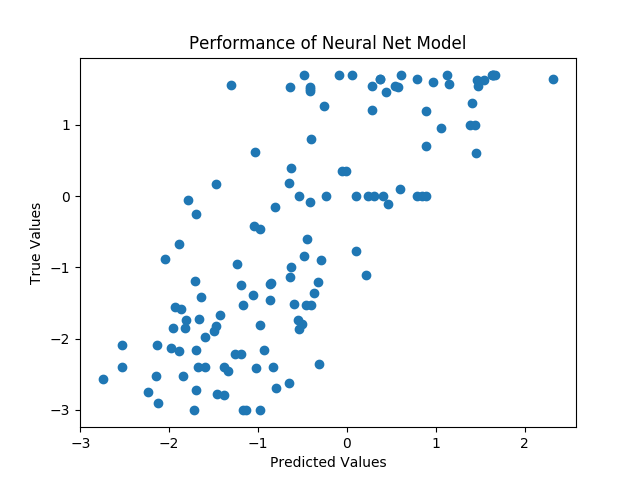

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
plt.title("Performance of Neural Net Model")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("True Values")
plt.savefig("../output/nn_results.png")